In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


0-th round
lr 0.1 | average train loss 2.24 | test loss 2.24 | test acc: 0.533
1-th round
lr 0.1 | average train loss 1.68 | test loss 1.33 | test acc: 0.725
2-th round
lr 0.1 | average train loss 1.07 | test loss 0.742 | test acc: 0.813
3-th round
lr 0.1 | average train loss 0.745 | test loss 0.494 | test acc: 0.869
4-th round
lr 0.1 | average train loss 0.582 | test loss 0.394 | test acc: 0.893
5-th round
lr 0.1 | average train loss 0.493 | test loss 0.32 | test acc: 0.915
6-th round
lr 0.1 | average train loss 0.447 | test loss 0.277 | test acc: 0.921
7-th round
lr 0.1 | average train loss 0.356 | test loss 0.246 | test acc: 0.929
8-th round
lr 0.1 | average train loss 0.328 | test loss 0.222 | test acc: 0.936
9-th round
lr 0.1 | average train loss 0.327 | test loss 0.205 | test acc: 0.940
[0.02560834214091301, 0.02271423488855362, 0.02100607007741928, 0.02253141812980175, 0.021680666133761406, 0.022397570312023163, 0.02208944782614708, 0.023419257253408432, 0.022326555103063583, 0.

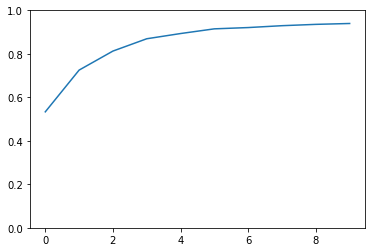

In [2]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

# Compute consensus

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()